# Titanic : Machine Learning from Disaster
Implementation using **some_fancy_feature_selection_here** feature selection and **some_fancy_classifier_here** classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [2]:
data_path = "data/"
data_train = pd.read_csv(data_path + "train.csv", delimiter=',')

cls = data_train["Survived"].values

In [3]:
data_train["Age"] = data_train["Age"].fillna(data_train["Age"].mean())
data_train["Name"] = pd.factorize(map(lambda x: x.split(' ')[1], data_train["Name"]))[0]
data_train["Sex"] = pd.factorize(data_train["Sex"])[0]
data_train["Cabin"] = map(lambda x: x+1, pd.factorize(data_train["Cabin"])[0])
data_train["Embarked"] = pd.factorize(data_train["Embarked"])[0]

data_train = data_train.drop(["PassengerId" ,"Survived", "Pclass", "Cabin", "Ticket", "Embarked", "Parch", "SibSp"], axis=1)

ftr = data_train.values

In [ ]:
def normFeature(x):
    x /= np.linalg.norm(x)
    x = x.tolist()
    return x
ftr = map(lambda x: normFeature(x), ftr)
ftr = np.array(ftr)

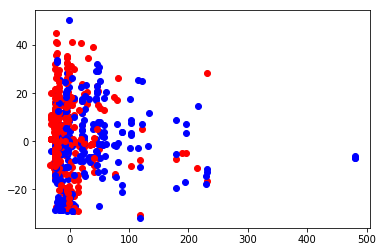

In [4]:
pca = PCA(n_components=2)
ftr_for_plot = pca.fit_transform(ftr)

for i in range(len(ftr)):
    line = plt.plot(ftr_for_plot[i][0], ftr_for_plot[i][1], "ro")
    if cls[i] == 0:
        plt.setp(line, color="r", linewidth=2.0)
    else:
        plt.setp(line, color="b", linewidth=2.0)

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(ftr, cls, test_size=0.3)
from sklearn.svm import SVC
accuracy = []
kfold = KFold(n_splits=10)
for train_index, test_index in kfold.split(ftr):
    x_train, x_test = ftr[train_index], ftr[test_index]
    y_train, y_test = cls[train_index], cls[test_index]

#     clf = RandomForestClassifier(n_estimators=1000, oob_score=True).fit(x_train, y_train)
    clf = SVC(kernel="poly").fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print acc
    accuracy.append(acc)

In [12]:
print "Average accuracy: " + str(np.mean(accuracy))

Average accuracy: 0.702596754057


In [10]:
print clf.feature_importances_

AttributeError: 'SVC' object has no attribute 'feature_importances_'

In [ ]:
data_train